# <font color="darkblue"> Prática 01: Regressão Linear - Renda Média Brasileira </font>

**Objetivos:**


*   Implementar o algoritmo de Regressão Linear
*   Fixar o conceito de regressão sobre dados e seus uso para previsão

**Requisitos de execução:**


*   Upload do arquivo *read_series.py*
*   Upload do arquivo *renda_Brasil_2012_2020.csv*

**Atividade 1:**

Leia a série temporal das rendas médias das famílias brasileiras contidas no arquivo *renda_Brasil_2012_2020.csv* e plote seus valores em um gráfico de dispersão.









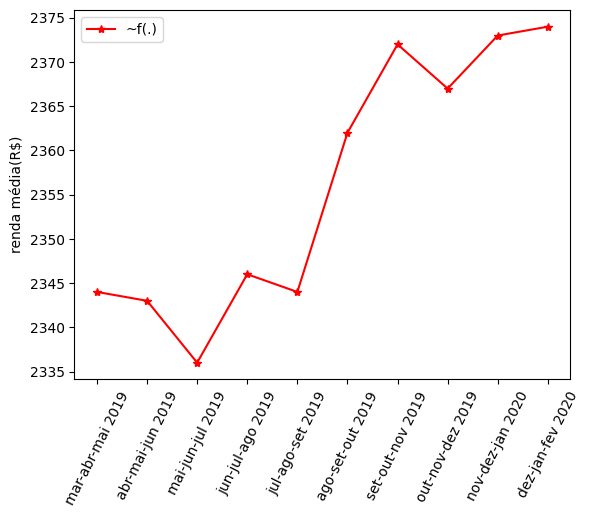

In [2]:
from read_series import ReadSeries
from matplotlib import pyplot as plt
import numpy as np

def config_plt():
    fig, ax = plt.subplots()
    #rotacionar os label do eixo x (datas)
    for label in ax.get_xticklabels():
        label.set_rotation(90*(-180/np.pi)+180)
        
    plt.ylabel('renda média(R$)')

        
data = []
time = []
rs = ReadSeries()
rs.read_income_csv(data, time)

_data = data[86:96]
_timeLabel = time[86:96]
_time = [i for i in range(len(_timeLabel))]

_timePstring = time[96:]
_timePredict = [i for i in range(len(_timeLabel) , len(_timeLabel)+len(_timePstring))]


config_plt()

plt.plot(_timeLabel, _data, 'r-*')
plt.legend(['~f(.)'], loc=2)

**Atividade 2:**

Implemente o algoritmo de Regressão Linear que retorne o vetor de pesos $w=(X^TX)^{-1}X^Ty$

In [3]:
class LinearRegression:
    def fit(self, _X, _y):
        self.X = np.array(_X)
        self.y = np.array(_y)
        self.w = np.linalg.inv(self.X.T.dot(self.X)).dot(self.X.T).dot(self.y)
    def predict(self, _x):
        x = np.array(_x)
        return x.dot(self.w)
    def getW(self):
        return self.w

**Atividade 3:** 

1. Utilize o algoritmo de Regressão Linear para computar a função hipotese $h(x)=w^Tx$ e plote a mesma no gráfico de dispersão;
2. Faça a previsão de 3 novos meses futuros e exiba esta previsão no gráfico.

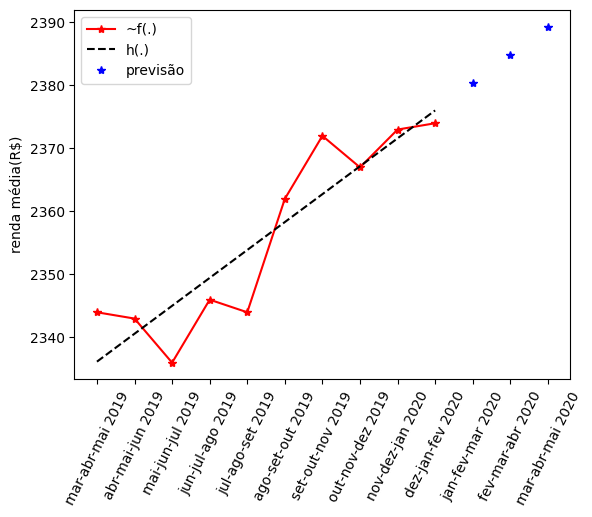

In [6]:
_timeRL = [[1, t] for t in _time]

lr = LinearRegression()
lr.fit(_timeRL, _data)

_dataRL = lr.predict(_timeRL)

_timeLabelForecast = time[96:]
_timeForecast = [i for i in range(len(_timeLabel), len(_timeLabel) + len(_timeLabelForecast))]
_dataForecast = lr.predict([[1, t] for t in _timeForecast])




config_plt()
    
plt.plot(_timeLabel, _data, 'r-*')
plt.plot(_timeLabel, _dataRL, 'k--')
plt.plot(_timeLabelForecast, _dataForecast, 'b*')

plt.legend(['~f(.)', 'h(.)', 'previsão'], loc=2)

**Atividade 4:**

Reproduza o mesmo experimento utilizando a classe *LinearRegression* do pacote *sklearn*

*from sklearn.linear_model import LinearRegression*


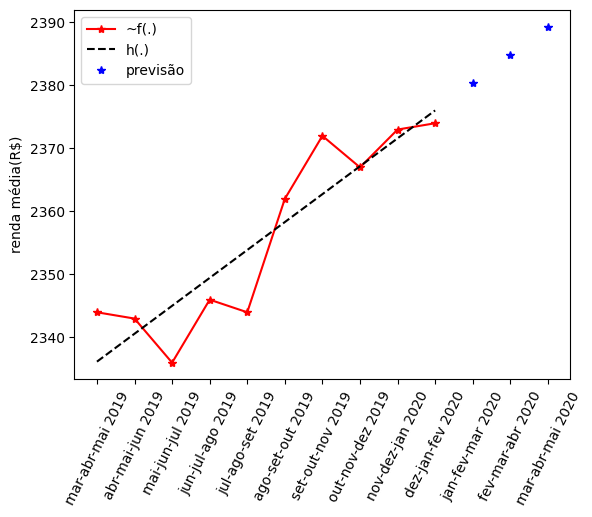

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(np.array(_timeRL), np.array(_data))

_dataRL = lr.predict(np.array(_timeRL))

_timeLabelForecast = time[96:]
_timeForecast = [i for i in range(len(_timeLabel), len(_timeLabel) + len(_timeLabelForecast))]
_dataForecast = lr.predict(np.array([[1, t] for t in _timeForecast]))

config_plt()
plt.plot(_timeLabel, _data, 'r-*')
plt.plot(_timeLabel, _dataRL, 'k--')
plt.plot(_timeLabelForecast, _dataForecast, 'b*')

plt.legend(['~f(.)', 'h(.)', 'previsão'], loc=2)

plt.show()